In [47]:
import numpy as np
import pandas as pd

In [48]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data', sep='\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [49]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


##### We can Merge then together

In [50]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### EDA
> Visualization Imports

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

###### Lets Create a ratings dataframe with average rating and number of ratings

In [52]:
df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [53]:
df.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [54]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [55]:
ratings['no. of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,no. of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Histogram

<AxesSubplot:>

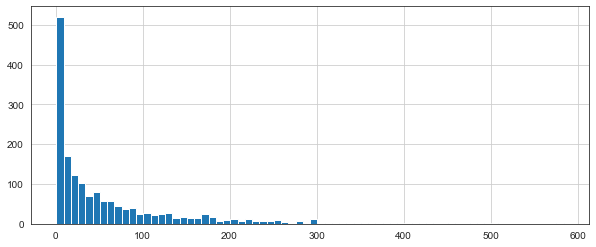

In [56]:
plt.figure(figsize = (10,4))
ratings['no. of rating'].hist(bins = 70)

<AxesSubplot:>

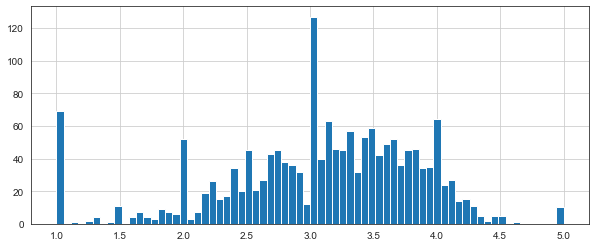

In [16]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

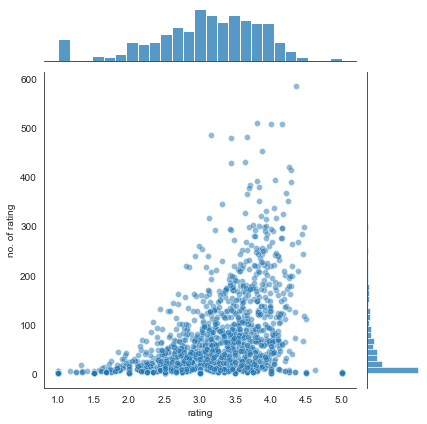

In [57]:
sns.jointplot(x = 'rating', y = 'no. of rating', data = ratings, alpha = 0.5)

#### Recommending Similar Movies

In [58]:
movies_rate = df.pivot_table(index = 'user_id',  columns = 'title', values = 'rating') 
movies_rate.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Most Rated Movies

In [59]:
ratings.sort_values('no. of rating', ascending=False).head(15)

,rating,no. of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


###### Now let's Grab the User Ratings for those two movies

In [60]:
starwars_user_ratings = movies_rate['Star Wars (1977)']
Liar_Liar_user_ratings = movies_rate['Liar Liar (1997)']
starwars_user_ratings.sample(10)

user_id
410    NaN
198    5.0
37     5.0
20     3.0
66     5.0
114    NaN
140    NaN
167    NaN
178    5.0
368    4.0
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations b/w two pandas series 

In [61]:
similar_StarWars = movies_rate.corrwith(starwars_user_ratings)
similar_LiarLiar = movies_rate.corrwith(Liar_Liar_user_ratings)

C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
type(similar_LiarLiar)

pandas.core.series.Series

lets clean nan value and make this pandas series to pandas DataFrame

In [67]:
corr_starwars = pd.DataFrame(similar_StarWars, columns=['Correlation'])
corr_starwars.dropna(inplace = True)
type(corr_starwars)

pandas.core.frame.DataFrame

In [68]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Remove those movies which are only watch at once,bcz wo sirf ek user ne dekha h sirf r wahi rating de diya h.
lets get filtering out that movies which is less than 100 reviews

In [69]:
corr_starwars = corr_starwars.join(ratings['no. of rating'])
corr_starwars.head()

,Correlation,no. of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [71]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation,no. of rating
title,,
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
"Beans of Egypt, Maine, The (1994)",1.0,2
"Good Man in Africa, A (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


lets get filtering out that movies which is less than 100 reviews

In [75]:
corr_starwars[corr_starwars['no. of rating'] > 100].sort_values('Correlation', ascending = False).head(10)

,Correlation,no. of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [76]:
corr_LiarLiar = pd.DataFrame(similar_LiarLiar, columns=['Correlation'])
corr_LiarLiar.dropna(inplace = True)
corr_LiarLiar = corr_LiarLiar.join(ratings['no. of rating'])
corr_LiarLiar[corr_LiarLiar['no. of rating'] > 100].sort_values('Correlation', ascending = False).head(10)

,Correlation,no. of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
